# Russian - Использование API Fmp Cloud для отбора акций по дивидендам на Nasdaq с помощью Python
> Search for high-dividend stocks

- toc: true
- branch: master
- badges: true
- comments: true
- author: Zmey56
- categories: [russian, python, algotrading, dividend]

# Использование API Fmp Cloud для отбора акций по дивидендам на Nasdaq с помощью Python

Акции с высокой дивидентной доходностью часто являются отличной инвестиционной стратегией для инвесторов, стремящихся получать приток денежных средств каждый год. В данной статье буден создан скрипт на Python для отбора их на бирже NASDAQ.

## Что такое дивидентная доходность?

Возьму определение из [Википедии](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B2%D0%B8%D0%B4%D0%B5%D0%BD%D0%B4%D0%BD%D0%B0%D1%8F_%D0%B4%D0%BE%D1%85%D0%BE%D0%B4%D0%BD%D0%BE%D1%81%D1%82%D1%8C). **Дивиде́ндная дохо́дность** (англ. dividend yield) — это отношение величины годового дивиденда на акцию к цене акции. Данная величина выражается чаще всего в процентах.

*Пример*

При цене акции ОАО «Лукойл» 1124,37 рублей и дивиденде 28 рублей на акцию дивидендная доходность будет равна:

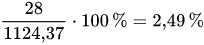


Так же необходимо обратить внимание, что многие растущие компании, такие как для примера Amazon и Yandex, не выплачивают дивиденды, поскольку они реинвестируют всю прибыль в развитие бизнеса. Поэтому дивидендная доходность для этих фирм будет равна нулю.

## Расчет дивидендной доходности с помощью Python

Расчет дивидендной доходности является простой задачей, которую можно выполнить с помощью финансового API под названием fmpcloud и Python. Этот API предлагает несколько бесплатных запросов в день после регистрации. 

1. Первым делом нужно извлечь список тикеров для всех акций, торгующихся на Nasdaq, по которым собираемся рассчитать дивидендную доходность. 

In [ ]:
import requests

demo = '39b9d9eeb3ba3fe57e039284db7ed2c0'

tickers = requests.get(f'https://fmpcloud.io/api/v3/symbol/available-nasdaq?apikey={demo}')

tickers = tickers.json()
symbols = []
for ticker in tickers:
  symbols.append(ticker['symbol'])
print(symbols)
#['SMMCW', 'VOD', 'TRMD', 'TRMB', 'NBL', 'EMMA',...]

TypeError: ignored

In [ ]:
    companydata = requests.get(f'https://fmpcloud.io/api/v3/profile/SMTA?apikey={demo}')
    companydata = companydata.json()

In [ ]:
companydata

{'Error Message': 'Limit Reach . Please upgrade your plan or visit our documentation for more details at https://fmpcloud.io/plans '}

In [ ]:
https://fmpcloud.io/api/v3/profile/AAPL?apikey=39b9d9eeb3ba3fe57e039284db7ed2c0

SyntaxError: ignored

In [ ]:
len(symbols)

5261

In [ ]:
"TBK" in symbols

False

2. После необходимо пройтись по полученому списку акций и получить финансовую информацию по компании. Так же необходимо понимать, что получаем только последние данные, а не за все время существование компании.

In [ ]:
DivYield = {}
for company in symbols:
  try:
    companydata = requests.get(f'https://fmpcloud.io/api/v3/profile/{company}?apikey={demo}')
    companydata = companydata.json()
    latest_Annual_Dividend = companydata[0]['lastDiv']
    price = companydata[0]['price']
    market_Capitalization = companydata[0]['mktCap']
    name = companydata[0]['companyName']
    exchange = companydata[0]['exchange']

    dividend_Yield= latest_Annual_Dividend/price
    DivYield[company] = {}
    DivYield[company]['Dividend_Yield'] = dividend_Yield
    DivYield[company]['latest_Price'] = price
    DivYield[company]['latest_Dividend'] = latest_Annual_Dividend
    DivYield[company]['market_Capit_in_M'] = market_Capitalization/1000000
    DivYield[company]['company_Name'] = name
    DivYield[company]['exchange'] = exchange
  except:
    pass
print(DivYield)

{'ATEN': {'Dividend_Yield': 0.0, 'latest_Price': 9.25, 'latest_Dividend': 0.0, 'market_Capit_in_M': 712.34336, 'company_Name': 'A10 Networks Inc', 'exchange': 'New York Stock Exchange'}, 'ABM': {'Dividend_Yield': 0.01836213668499607, 'latest_Price': 50.92, 'latest_Dividend': 0.935, 'market_Capit_in_M': 3416.20736, 'company_Name': 'ABM Industries Inc', 'exchange': 'New York Stock Exchange'}, 'EMD': {'Dividend_Yield': 0.0870722433460076, 'latest_Price': 13.15, 'latest_Dividend': 1.145, 'market_Capit_in_M': 798.80986, 'company_Name': 'Western Asset Emerging Markets Debt Fund Inc', 'exchange': 'New York Stock Exchange'}, 'NM-PG': {'Dividend_Yield': 0.0, 'latest_Price': 12.2, 'latest_Dividend': 0.0, 'market_Capit_in_M': 77.285168, 'company_Name': 'Navios Maritime Holdings Inc.', 'exchange': 'New York Stock Exchange'}, 'ARCH': {'Dividend_Yield': 0.01232134056185313, 'latest_Price': 40.58, 'latest_Dividend': 0.5, 'market_Capit_in_M': 621.55981, 'company_Name': 'Arch Resources Inc', 'exchange'

Сбор данных может занять значительное по продолжительности время. После их можно представить в виде отсортированного DataFrame, где сверху будут акций с высокой дивидендной доходностью. 

In [ ]:
import pandas as pd
DivYield_dataframe = pd.DataFrame.from_dict(DivYield, orient='index')

DivYield_dataframe = DivYield_dataframe.sort_values(['Dividend_Yield'], ascending=[False])
DivYield_dataframe.head(15)

,Dividend_Yield,latest_Price,latest_Dividend,market_Capit_in_M,company_Name,exchange
SMTA,11.711829,0.767600,8.9900,33.143432,Spirit MTA REIT,New York Stock Exchange
FELP,1.517067,0.158200,0.2400,23.080430,Foresight Energy LP representing Limited Partn...,New York Stock Exchange
MDLX,0.732039,2.349600,1.7200,0.000000,Medley LLC 6.875% Senior Notes due 2026,New York Stock Exchange
MDLQ,0.719920,2.510000,1.8070,0.000000,Medley LLC 7.25% Notes due 2024,New York Stock Exchange
SDT,0.705351,0.170128,0.1200,4.763584,SandRidge Mississippian Trust I of Beneficial ...,New York Stock Exchange
BAP,0.281443,137.870000,38.8026,10996.718600,Credicorp Ltd,New York Stock Exchange
MLPZ,0.262611,3.945000,1.0360,29.673096,UBS AG ETRACS ETRACS 2xMonthly Leveraged S&P M...,New York Stock Exchange Arca
REVS,0.245221,19.040000,4.6690,0.000000,Columbia Research Enhanced Value ETF,NYSEArca
BMA,0.168212,13.370000,2.2490,1366.801660,Banco Macro S.A. ADR (representing Ten Class B),New York Stock Exchange
NTC,0.159468,12.040000,1.9200,172.521152,Nuveen Connecticut Quality Municipal Income Fund,New York Stock Exchange


## Анализ полученного результата и заключение

Предварительно проведем расчет средней дивидендной доходности по акциям которые платят дивиденды:

In [ ]:
meanDivNasdaq = DivYield_dataframe[DivYield_dataframe['Dividend_Yield']>0]['Dividend_Yield'].mean()
print("Средняя дивидендная доходность по рынку Nasdaq равна ", "{:.2%}".format(meanDivNasdaq))

Средняя дивидендная доходность по рынку Nasdaq равна  12.22%


Самой высокой дивидендной доходностью в полученных результатах у акций компании Triumph Bancorp Inc — 21,57%. Правда по ним никогда не платили дивиденды. Так что в системе похоже сидит баг. Так же по другим рынкам заметил, что в список могут включаться акции по которым перестали платить дивиденды давно. А так, как подписка Free ограничена по количеству запросов, то подстроить ее не удалось. Так же в том случае, если при проверке выясняется, что дивиденды платили недавно, то все равно необходимо быть осторожным при выборе компаний по данному показателю, так как он может являться результатом падения цены акций и как следствия ростом дивидендной доходности. Так же выплата высоких дивидендов может не сохраниться в будущем, тем более если у компании возникнут финансовые проблемы.

Основной смысл в следующем - анализ дивидендной доходности не должен быть единственным критерием. Я для одного из своих портфелей так же смотрю: EPS, EBITDA, FCF, срок выплаты дивидендов, капитализация компании, чистая рентабельность (отношение выручки к прибыли) и коэффициент Net Debt/EBITDA.

Но как говориться - все вышеприведенное не является инвестиционной рекомендацией и выбор остается за каждым самостоятельно.